In [1]:
!date

Sun Nov 22 13:49:47 PST 2020


In [2]:
# install kallisto and bustools and seqkit
!git clone https://github.com/pachterlab/MBGBLHGP_2019.git
#!cp MBGBLHGP_2019/notebooks/merge/kallisto /usr/local/bin/
#!cp MBGBLHGP_2019/notebooks/merge/bustools /usr/local/bin/
#!wget --quiet https://github.com/shenwei356/seqkit/releases/download/v0.13.2/seqkit_linux_amd64.tar.gz && tar -xvf seqkit_linux_amd64.tar.gz && cp seqkit /usr/local/bin/

Cloning into 'MBGBLHGP_2019'...
remote: Enumerating objects: 354, done.
remote: Total 354 (delta 0), reused 0 (delta 0), pack-reused 354
Receiving objects: 100% (354/354), 222.83 MiB | 9.22 MiB/s, done.
Resolving deltas: 100% (138/138), done.
Checking out files: 100% (100/100), done.


In [10]:
!mkdir -p full/sp full/un split ref/split ref/full

In [4]:
!gunzip MBGBLHGP_2019/notebooks/linnarson/*.gz
!mv MBGBLHGP_2019/notebooks/linnarson/* .

In [6]:
# download fastqs
!wget --quiet -O r1.fastq.gz https://caltech.box.com/shared/static/6boju5zerptobm51fkbq5zwmchjhhk92.gz
!wget --quiet -O r2.fastq.gz https://caltech.box.com/shared/static/adme7zu1y8nz4ng2ph5wjbei6unvy093.gz

# full

In [7]:
!kallisto index -i cdna.idx cdna.fa
!kallisto index -i intron.idx intron.fa


[build] loading fasta file cdna.fa
[build] k-mer length: 31
[build] warning: clipped off poly-A tail (longer than 10)
        from 1767 target sequences
[build] warning: replaced 2 non-ACGUT characters in the input sequence
        with pseudorandom nucleotides
[build] counting k-mers ... done.
[build] building target de Bruijn graph ...  done 
[build] creating equivalence classes ...  done
[build] target de Bruijn graph has 771671 contigs and contains 64238278 k-mers 


[build] loading fasta file intron.fa
[build] k-mer length: 31
[build] warning: replaced 4387 non-ACGUT characters in the input sequence
        with pseudorandom nucleotides
[build] counting k-mers ... done.
[build] building target de Bruijn graph ...  done 
[build] creating equivalence classes ...  done
[build] target de Bruijn graph has 6741838 contigs and contains 215114494 k-mers 



In [11]:
!MBGBLHGP_2019/notebooks/merge/kallisto bus \
-x 10xv2 \
-t 8 \
-i cdna.idx \
-o full/sp/ \
r1.fastq.gz r2.fastq.gz

!MBGBLHGP_2019/notebooks/merge/kallisto bus \
-x 10xv2 \
-t 8 \
-i intron.idx \
-o full/un/ \
r1.fastq.gz r2.fastq.gz


[index] k-mer length: 31
[index] number of targets: 224,598
[index] number of k-mers: 64,238,278
[index] number of equivalence classes: 598,282
[quant] will process sample 1: r1.fastq.gz
                               r2.fastq.gz
[quant] finding pseudoalignments for the reads ... done
[quant] processed 50,000,000 reads, 30,256,590 reads pseudoaligned

[index] k-mer length: 31
[index] number of targets: 620,740
[index] number of k-mers: 215,114,494
[index] number of equivalence classes: 4,141,914
[quant] will process sample 1: r1.fastq.gz
                               r2.fastq.gz
[quant] finding pseudoalignments for the reads ... done
[quant] processed 50,000,000 reads, 19,399,703 reads pseudoaligned

In [12]:
!MBGBLHGP_2019/notebooks/merge/bustools sort -o full/sp/s.bus full/sp/output.bus
!MBGBLHGP_2019/notebooks/merge/bustools sort -o full/un/s.bus full/un/output.bus

Read in 30256590 BUS records
Read in 19399703 BUS records


In [13]:
!MBGBLHGP_2019/notebooks/merge/bustools correct -w 10xv2_whitelist.txt -o full/sp/cs.bus full/sp/s.bus
!MBGBLHGP_2019/notebooks/merge/bustools correct -w 10xv2_whitelist.txt -o full/un/cs.bus full/un/s.bus

Found 737280 barcodes in the whitelist
Processed 18507219 BUS records
In whitelist = 17906806
Corrected    = 171171
Uncorrected  = 429242
Found 737280 barcodes in the whitelist
Processed 10346597 BUS records
In whitelist = 9969900
Corrected    = 111097
Uncorrected  = 265600


In [14]:
!MBGBLHGP_2019/notebooks/merge/bustools sort -o full/sp/scs.bus full/sp/cs.bus
!MBGBLHGP_2019/notebooks/merge/bustools sort -o full/un/scs.bus full/un/cs.bus

Read in 18077977 BUS records
Read in 10080997 BUS records


In [15]:
!mkdir -p full/sp/count
!mkdir -p full/un/count

In [16]:
!MBGBLHGP_2019/notebooks/merge/bustools count --genecounts -m \
-g transcripts_to_genes.txt \
-o full/sp/count/count \
-e full/sp/matrix.ec \
-t full/sp/transcripts.txt \
full/sp/scs.bus

In [17]:
!MBGBLHGP_2019/notebooks/merge/bustools count --genecounts -m \
-g transcripts_to_genes.txt \
-o full/un/count/count \
-e full/un/matrix.ec \
-t full/un/transcripts.txt \
full/un/scs.bus

# Split

### Split the index

In [18]:
!seqkit split -p 2 cdna.fa
!seqkit split -p 2 intron.fa

[INFO] split into 2 parts
[INFO] read sequences ...
[INFO] read 224598 sequences
[INFO] write 112299 sequences to file: cdna.fa.split/cdna.part_001.fa
[INFO] write 112299 sequences to file: cdna.fa.split/cdna.part_002.fa
[INFO] split into 2 parts
[INFO] read sequences ...
[INFO] read 620740 sequences
[INFO] write 310370 sequences to file: intron.fa.split/intron.part_001.fa
[INFO] write 310370 sequences to file: intron.fa.split/intron.part_002.fa


### Create the kallisto indices

In [ ]:
!cd cdna.fa.split/ && for f in *.gz; do kallisto index -i $(echo $f |  cut -d"." -f5).idx $f; done
!cd intron.fa.split/ && for f in *.gz; do kallisto index -i $(echo $f |  cut -d"." -f5).idx $f; done

In [ ]:
!mv cdna.idx ref/full
!mv indtron.idx ref/full
!mv cdna.fa* ref/split/
!mv intron.fa* ref/split/

In [ ]:
!mkdir -p split/sp/o1 split/sp/o2
!mkdir -p split/un/o1 split/un/o2

### Pseudoalign the reads

In [ ]:
!for d in ./split/sp/o*; do MBGBLHGP_2019/notebooks/merge/kallisto bus -k -n -x 10xv2 -o $d \
-i ref/split/cdna.fa.split/part_00$(echo $d | cut -c10).idx \
r1.fastq.gz \
r2.fastq.gz; done

!for d in ./split/un/o*; do MBGBLHGP_2019/notebooks/merge/kallisto bus -k -n -x 10xv2 -o $d \
-i ref/split/intron.fa.split/part_00$(echo $d | cut -c10).idx \
r1.fastq.gz \
r2.fastq.gz; done

### Mash and merge the busfiles

In [ ]:
!for d in ./split/sp/o*; do MBGBLHGP_2019/notebooks/merge/bustools sort --flags -o $d/flagsort.bus $d/output.bus; done
!for d in ./split/un/o*; do MBGBLHGP_2019/notebooks/merge/bustools sort --flags -o $d/flagsort.bus $d/output.bus; done

In [ ]:
!for d in ./split/sp/o*; do mv $d/flagsort.bus $d/output.bus; done
!for d in ./split/un/o*; do mv $d/flagsort.bus $d/output.bus; done

In [ ]:
!MBGBLHGP_2019/notebooks/merge/bustools mash -o ./split/sp/mashed ./split/sp/o*
!MBGBLHGP_2019/notebooks/merge/bustools mash -o ./split/un/mashed ./split/un/o*

In [ ]:
!MBGBLHGP_2019/notebooks/merge/bustools sort --flags -o ./split/sp/mashed/smashed.bus ./split/sp/mashed/mashed.bus
!MBGBLHGP_2019/notebooks/merge/bustools sort --flags -o ./split/un/mashed/smashed.bus ./split/un/mashed/mashed.bus

In [ ]:
# spliced
!MBGBLHGP_2019/notebooks/merge/bustools merge \
-o ./split/sp/mashed/merged.bus \
-e ./split/sp/mashed/matrix.ec \
-t ./split/sp/mashed/transcripts.txt \
   ./split/sp/mashed/smashed.bus

!mv merged.ec ./split/sp/mashed/

# unspliced
!MBGBLHGP_2019/notebooks/merge/bustools merge \
-o ./split/un/mashed/merged.bus \
-e ./split/un/mashed/matrix.ec \
-t ./split/un/mashed/transcripts.txt \
   ./split/un/mashed/smashed.bus

!mv merged.ec ./split/un/mashed/

### Standard bustools commands

In [ ]:
# spliced bustools commands
!MBGBLHGP_2019/notebooks/merge/bustools sort \
-o ./split/sp/mashed/s.bus \
   ./split/sp/mashed/merged.bus

!MBGBLHGP_2019/notebooks/merge/bustools correct \
-w 10xv2_whitelist.txt \
-o ./split/sp/mashed/cs.bus \
   ./split/sp/mashed/s.bus

!MBGBLHGP_2019/notebooks/merge/bustools sort \
-o ./split/sp/mashed/scs.bus \
   ./split/sp/mashed/cs.bus

!mkdir -p ./split/sp/mashed/count

!MBGBLHGP_2019/notebooks/merge/bustools count \
--genecounts -m \
-g ref/full/t2g.txt \
-o ./split/sp/mashed/count/count \
-e ./split/sp/mashed/merged.ec \
-t ./split/sp/mashed/transcripts.txt \
   ./split/sp/mashed/scs.bus

In [ ]:
# unspliced bustools commands
!MBGBLHGP_2019/notebooks/merge/bustools sort \
-o ./split/un/mashed/s.bus \
   ./split/un/mashed/merged.bus

!MBGBLHGP_2019/notebooks/merge/bustools correct \
-w 10xv2_whitelist.txt \
-o ./split/un/mashed/cs.bus \
   ./split/un/mashed/s.bus

!MBGBLHGP_2019/notebooks/merge/bustools sort \
-o ./split/un/mashed/scs.bus \
   ./split/un/mashed/cs.bus

!mkdir -p ./split/un/mashed/count

!MBGBLHGP_2019/notebooks/merge/bustools count \
--genecounts -m \
-g ref/full/t2g.txt \
-o ./split/un/mashed/count/count \
-e ./split/un/mashed/merged.ec \
-t ./split/un/mashed/transcripts.txt \
   ./split/un/mashed/scs.bus

# Comparison

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import string
from scipy import stats
from scipy.io import mmread
from collections import defaultdict
from kb_python.utils import import_matrix_as_anndata # (matrix_path, barcodes_path, genes_path)

def nd(arr):
    return np.asarray(arr).reshape(-1)


def yex(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    return ax

fsize=15

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [21]:
# full
base = 'full/'
matrix_path = os.path.join(base,   'sp/count/count.mtx')
barcodes_path = os.path.join(base, 'sp/count/count.barcodes.txt')
genes_path = os.path.join(base,    'sp/count/count.genes.txt')
spliced = import_matrix_as_anndata(matrix_path, barcodes_path, genes_path)

matrix_path = os.path.join(base,   'un/count/count.mtx')
barcodes_path = os.path.join(base, 'un/count/count.barcodes.txt')
genes_path = os.path.join(base,    'un/count/count.genes.txt')
unspliced = import_matrix_as_anndata(matrix_path, barcodes_path, genes_path)

spliced.X = spliced.X.astype(int)
unspliced.X = unspliced.X.astype(int)

In [22]:
# split
base = 'split/'
matrix_path = os.path.join(base,   'sp/mashed/count/count.mtx')
barcodes_path = os.path.join(base, 'sp/mashed/count/count.barcodes.txt')
genes_path = os.path.join(base,    'sp/mashed/count/count.genes.txt')
split_spliced = import_matrix_as_anndata(matrix_path, barcodes_path, genes_path)

matrix_path = os.path.join(base,   'un/mashed/count/count.mtx')
barcodes_path = os.path.join(base, 'un/mashed/count/count.barcodes.txt')
genes_path = os.path.join(base,    'un/mashed/count/count.genes.txt')
split_unspliced = import_matrix_as_anndata(matrix_path, barcodes_path, genes_path)

split_spliced.X = split_spliced.X.astype(int)
split_unspliced.X = split_unspliced.X.astype(int)

In [23]:
split_spliced

AnnData object with n_obs × n_vars = 138977 × 58351

In [24]:
spliced

AnnData object with n_obs × n_vars = 176317 × 58351

# Filter them appropriately

In [25]:
split_spliced   = split_spliced[split_spliced.obs.index.isin(spliced.obs.index),:]
split_unspliced = split_unspliced[split_unspliced.obs.index.isin(unspliced.obs.index),:]

spliced = spliced[spliced.obs.index.isin(split_spliced.obs.index)]
unspliced = unspliced[unspliced.obs.index.isin(split_unspliced.obs.index)]

In [26]:
print(split_spliced)
print(spliced)

print(split_unspliced)
print(unspliced)

View of AnnData object with n_obs × n_vars = 129941 × 58351
View of AnnData object with n_obs × n_vars = 129941 × 58351
View of AnnData object with n_obs × n_vars = 86343 × 30954
View of AnnData object with n_obs × n_vars = 86343 × 30954


# Plot

In [27]:
# each dot is a cell
data_s = (nd(spliced.X.sum(axis=1)), nd(split_spliced.X.sum(axis=1)))
r_s, p_s = stats.pearsonr(np.log1p(data_s[0]), np.log1p(data_s[1]))

# each dot is a cell
data_u = (nd(unspliced.X.sum(axis=1)), nd(split_unspliced.X.sum(axis=1)))
r_u, p_u = stats.pearsonr(np.log1p(data_u[0]), np.log1p(data_u[1]))

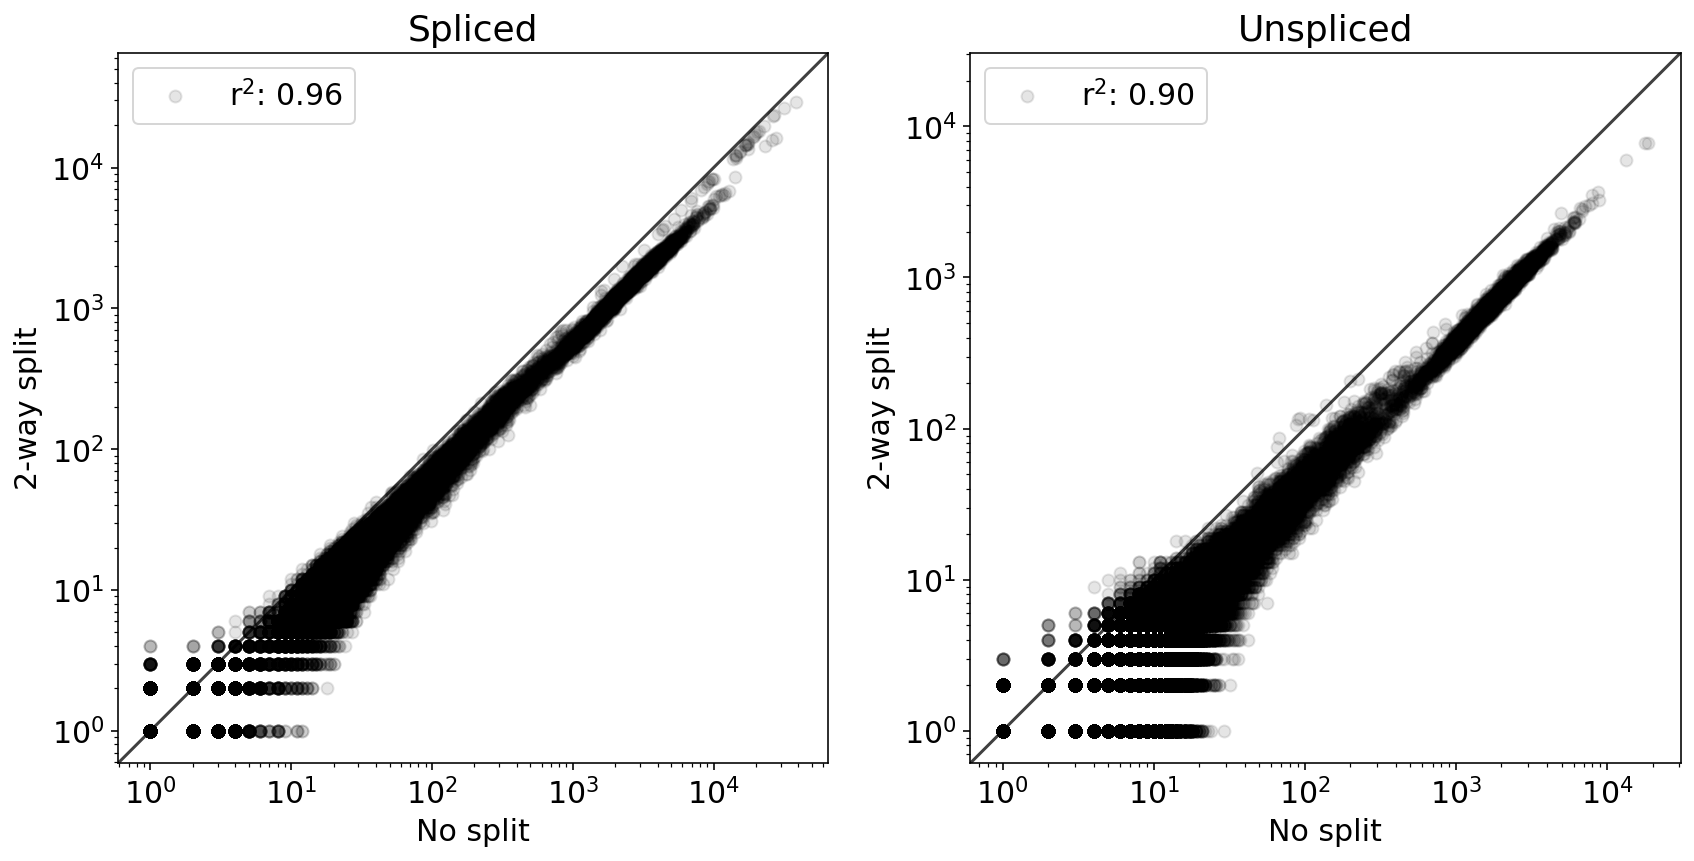

In [28]:
fig, ax = plt.subplots(figsize=(14,7), ncols=2)



x = data_s[0]
y = data_s[1]

ax[0].plot(x, y, 'o', alpha=0.1, color="k", label=f"r$^2$: {r_s**2:,.2f}")

kwd = {
    "xscale": 'log',
    "yscale": "log",
    "xlabel": "No split",
    "ylabel": "2-way split",
    "title": "Spliced"
}
ax[0].set(**kwd)
yex(ax[0])

ax[0].legend()



x = data_u[0]
y = data_u[1]

ax[1].plot(x, y, 'o', alpha=0.1, color="k", label=f"r$^2$: {r_u**2:,.2f}")

kwd = {
    "xscale": 'log',
    "yscale": "log",
    "xlabel": "No split",
    "ylabel": "2-way split",
    "title": 'Unspliced'
}
ax[1].set(**kwd)
yex(ax[1])
ax[1].legend()

plt.savefig("./spliced_unspliced_split.png", dpi=300, bbox_inches="tight")

fig.show()